In [1]:
import os
os.environ["LC_ALL"] = "C.UTF-8"
os.environ["LANG"] = "en_US.UTF-8"
os.environ["JULIA_NUM_THREADS"] = f"{os.cpu_count()-2}"

import numpy as np
from pysr import PySRRegressor
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline  

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
N = 64
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(x, y)

In [3]:
# Formula of ground truth
Z = np.exp(-(X**2 + Y**2)) 

In [4]:
X_input = np.column_stack((X.ravel(), Y.ravel()))
y_output = Z.ravel()

model = PySRRegressor(
    niterations=100,
    binary_operators=["+", "-", "*", "/"],
    unary_operators=["sin", "cos", "exp", "log", "square"],
    extra_sympy_mappings={},
    verbosity=0,
)

model.fit(X_input, y_output)

/home/david/anaconda3/envs/sr/lib/python3.13/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


,model_selection,'best'
,binary_operators,"['+', '-', ...]"
,unary_operators,"['sin', 'cos', ...]"
,expression_spec,None
,niterations,100
,populations,31
,population_size,27
,max_evals,None
,maxsize,30
,maxdepth,None
,warmup_maxsize_by,None


In [5]:
Z_generated = model.predict(X_input).reshape(N, N)
print(Z_generated)

[[0.16231483 0.16196388 0.16381627 ... 0.16381627 0.16196388 0.16231483]
 [0.16224311 0.16457976 0.16878572 ... 0.16878572 0.16457976 0.16224311]
 [0.1653628  0.16988371 0.17598579 ... 0.17598579 0.16988371 0.1653628 ]
 ...
 [0.1653628  0.16988371 0.17598579 ... 0.17598579 0.16988371 0.1653628 ]
 [0.16224311 0.16457976 0.16878572 ... 0.16878572 0.16457976 0.16224311]
 [0.16231483 0.16196388 0.16381627 ... 0.16381627 0.16196388 0.16231483]]


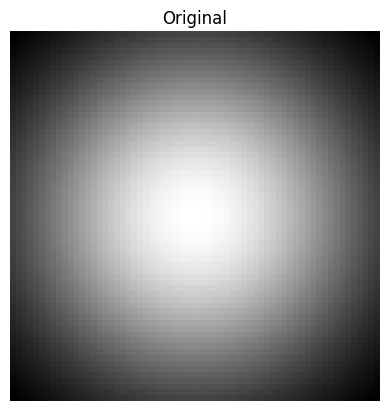

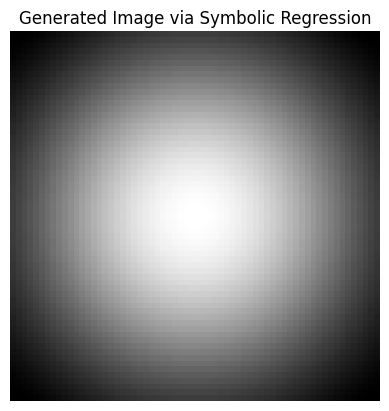

In [6]:
plt.imshow(Z, cmap='gray')
plt.title("Original")
plt.axis("off")
plt.show()

plt.imshow(Z_generated, cmap='gray')
plt.title("Generated Image via Symbolic Regression")
plt.axis("off")
plt.show()

In [7]:
print("Formula: ", model.sympy())

Formula:  0.83076461807641*cos(x1*1.0600917)**2*cos(x0/((cos(x1*cos(cos(x0*x1**2)))*0.94316405)))**2 - 1*(-0.16182536)


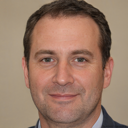

In [25]:
img = Image.open("image.jpeg").convert("RGB").resize((128, 128))
display(img)

img_np = np.asarray(img) / 255.0 

R = img_np[:, :, 0]
G = img_np[:, :, 1]
B = img_np[:, :, 2]

N = R.shape[0]

In [26]:
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(x, y)
XY = np.column_stack((X.ravel(), Y.ravel()))

In [27]:
def fit_channel(channel):
    model = PySRRegressor(
        niterations=3000,
        populations=50,
        model_selection='best',
        binary_operators=["+", "-", "*", "/"],
        unary_operators=["neg", "square", "cube", "cbrt", "sqrt", "abs", "sign", "inv",
                         "exp", "log", "log10", "log2", "log1p", "sin", "cos", "tan", "asin", "acos", "atan",
                         "sinh", "cosh", "tanh", "asinh", "acosh", "atanh",
                         "erf", "erfc", "relu", "sinc",
                         "round"],
        extra_sympy_mappings={},
        verbosity=0,
        batching=True,
        batch_size=128
    )
    model.fit(XY, channel.ravel())
    return model

model_r = fit_channel(R)
model_g = fit_channel(G)
model_b = fit_channel(B)

/home/david/anaconda3/envs/sr/lib/python3.13/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
┌ Warning: You have passed over 15 unary operators. To prevent long compilation times, some optimizations will be disabled. If this presents an issue, please open an issue on https://github.com/SymbolicML/DynamicExpressions.jl
└ @ DynamicExpressions.OperatorEnumConstructionModule ~/.julia/packages/DynamicExpressions/wtMlL/src/OperatorEnumConstruction.jl:446
/home/david/anaconda3/envs/sr/lib/python3.13/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
┌ Warning: You have passed over 15 unary operators. To prevent long compilation times, some optimizations will be disabled. If this presents an issue, please open an issue on https://github.com/SymbolicML/DynamicExpressions.jl
└ @ DynamicExpressions.Operator

In [28]:
R_pred = model_r.predict(XY).reshape(N, N)
G_pred = model_g.predict(XY).reshape(N, N)
B_pred = model_b.predict(XY).reshape(N, N)

def normalize(channel):
    return np.clip((channel - channel.min()) / (channel.max() - channel.min() + 1e-8), 0, 1)

RGB_approx = np.stack([
    normalize(R_pred),
    normalize(G_pred),
    normalize(B_pred)
], axis=-1)

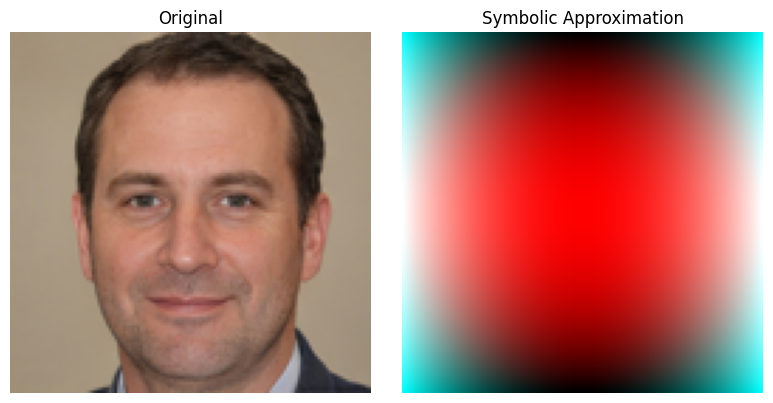

In [29]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(img_np)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(RGB_approx)
plt.title("Symbolic Approximation")
plt.axis("off")

plt.tight_layout()

plt.savefig('image_result.png', dpi=100)
plt.show()

In [13]:
eq_r = model_r.get_best()
eq_g = model_g.get_best()
eq_b = model_b.get_best()

print("R(x, y):", model_r.sympy())
print("G(x, y):", model_g.sympy())
print("B(x, y):", model_b.sympy())

R(x, y): log(cos(sinc(-1*0.3969362 + sinc(x1)/((0.32624444/cos(x0/(-0.42370984)))))) + 1)
G(x, y): log(cos(cos(x0**2)) + 1)
B(x, y): cos(cos((x1**2 - 7.4138613)*cos(x0))**3)*0.4850954


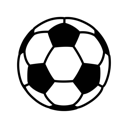

In [14]:
img = Image.open("ball.jpg").convert("RGB").resize((128, 128))
display(img)

img_np = np.asarray(img) / 255.0 

R = img_np[:, :, 0]
G = img_np[:, :, 1]
B = img_np[:, :, 2]

N = R.shape[0]

In [15]:
model_r = fit_channel(R)
model_g = fit_channel(G)
model_b = fit_channel(B)

/home/david/anaconda3/envs/sr/lib/python3.13/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
┌ Warning: You have passed over 15 unary operators. To prevent long compilation times, some optimizations will be disabled. If this presents an issue, please open an issue on https://github.com/SymbolicML/DynamicExpressions.jl
└ @ DynamicExpressions.OperatorEnumConstructionModule ~/.julia/packages/DynamicExpressions/wtMlL/src/OperatorEnumConstruction.jl:446
/home/david/anaconda3/envs/sr/lib/python3.13/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
┌ Warning: You have passed over 15 unary operators. To prevent long compilation times, some optimizations will be disabled. If this presents an issue, please open an issue on https://github.com/SymbolicML/DynamicExpressions.jl
└ @ DynamicExpressions.Operator

In [22]:
R_pred = model_r.predict(XY).reshape(N, N)
G_pred = model_g.predict(XY).reshape(N, N)
B_pred = model_b.predict(XY).reshape(N, N)

RGB_approx = np.stack([
    normalize(R_pred),
    normalize(G_pred),
    normalize(B_pred)
], axis=-1)

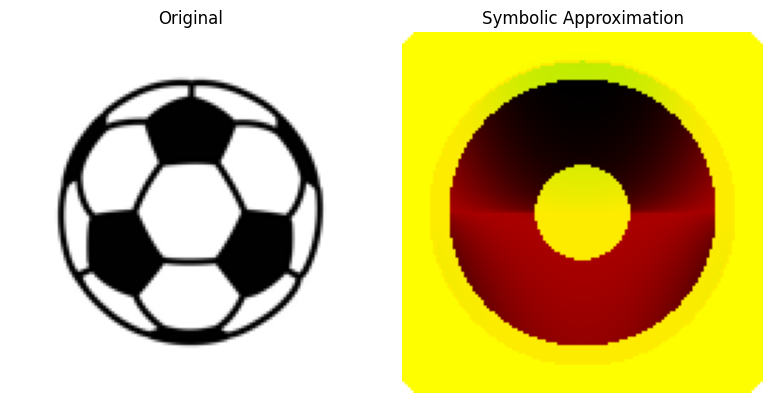

In [23]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(img_np)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(RGB_approx)
plt.title("Symbolic Approximation")
plt.axis("off")

plt.tight_layout()

plt.savefig('ball_result.png', dpi=100)
plt.show()

In [24]:
eq_r = model_r.get_best()
eq_g = model_g.get_best()
eq_b = model_b.get_best()

print("R(x, y):", model_r.sympy())
print("G(x, y):", model_g.sympy())
print("B(x, y):", model_b.sympy())

R(x, y): tanh(cos(sin(cosh(sinc(x0))**3 - Abs(x1)**(1/3)*sign(x1)))**2*ceiling(cosh(3.94702897656065*x0**2 + 3.94702897656065*x1**2 - 1.23688197025582) - 0.5)**2)
G(x, y): erf(ceiling(((x0**2 + x1**2)/0.34513327 - 0.9073735)**2 - 0.5) + 0.48609376)
B(x, y): cos(ceiling(sinc(x0**2 + x1**2) - 0.5))
